In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/heat_problem/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#EDA

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.shape

(918, 12)

In [ ]:
df.info() # no null value find out

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='HeartDisease'>

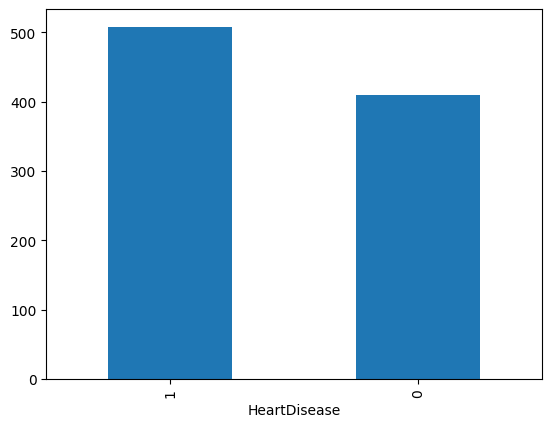

In [ ]:
df['HeartDisease'].value_counts().plot(kind='bar') ## for prediction the data is equally distribute

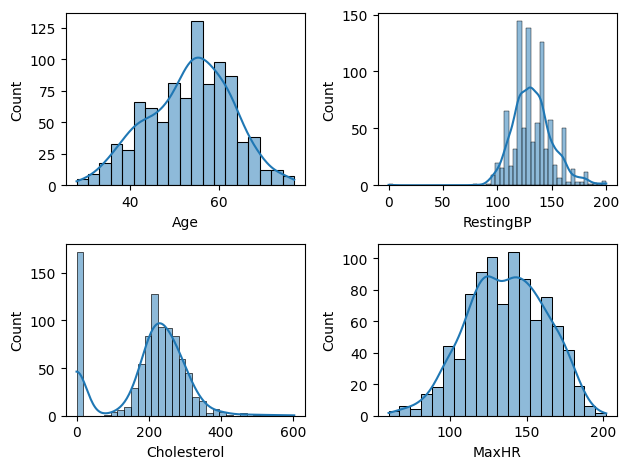

In [ ]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde =True)

plotting('Age',1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


In [ ]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()
ch_mean.round(2)


np.float64(244.64)

In [ ]:
Rbp_mean = df.loc[df['RestingBP'] != 0,'RestingBP'].mean()
Rbp_mean.round(2)

np.float64(132.54)

In [ ]:
df['Cholesterol']= df['Cholesterol'].replace(0,ch_mean)
df['RestingBP']= df['RestingBP'].replace(0,Rbp_mean)

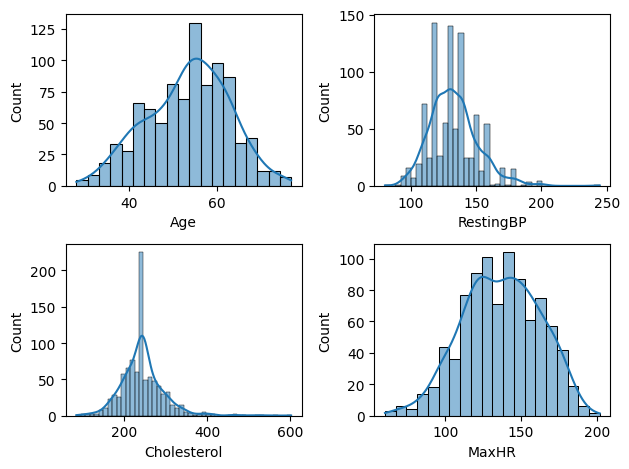

In [ ]:
def plotting(var,num):
  plt.subplot(2,2,num)
  sns.histplot(df[var],kde =True)

plotting('Age',1)
plotting("RestingBP",2)
plotting("Cholesterol",3)
plotting("MaxHR",4)

plt.tight_layout()

<Axes: xlabel='Sex', ylabel='count'>

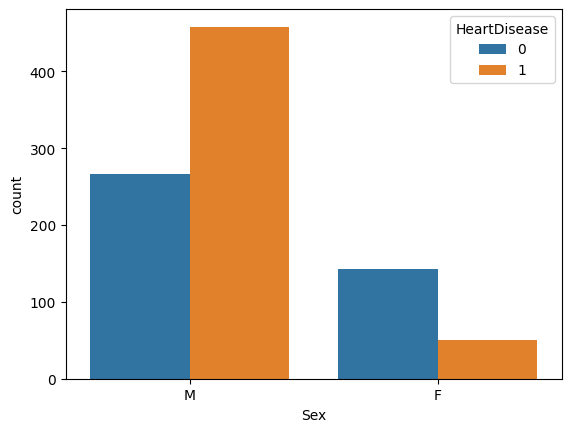

In [ ]:
sns.countplot(x=df['Sex'],hue=df['HeartDisease'])

<Axes: xlabel='ChestPainType', ylabel='count'>

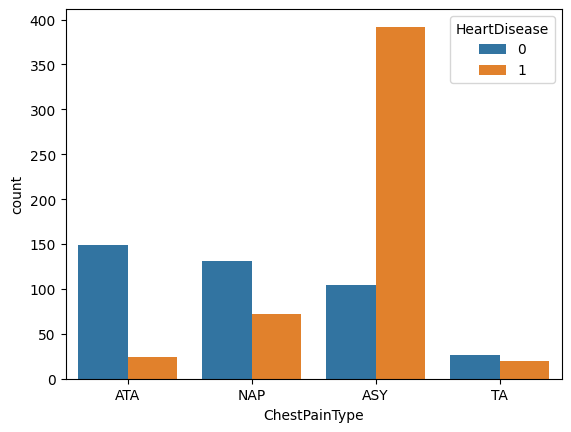

In [ ]:
sns.countplot(x=df['ChestPainType'],hue=df['HeartDisease'])

<Axes: xlabel='FastingBS', ylabel='count'>

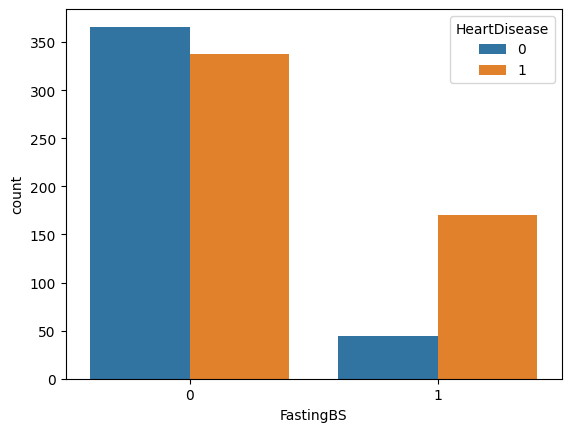

In [ ]:
sns.countplot(x=df['FastingBS'],hue=df['HeartDisease'])

<Axes: xlabel='HeartDisease', ylabel='MaxHR'>

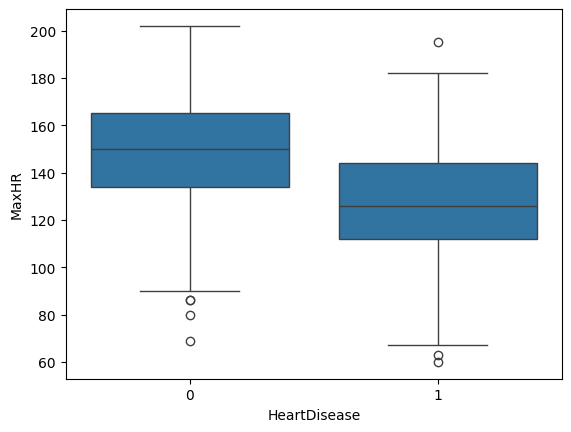

In [ ]:
sns.boxplot(x= 'HeartDisease', y='MaxHR',data=df)

<Axes: xlabel='HeartDisease', ylabel='Age'>

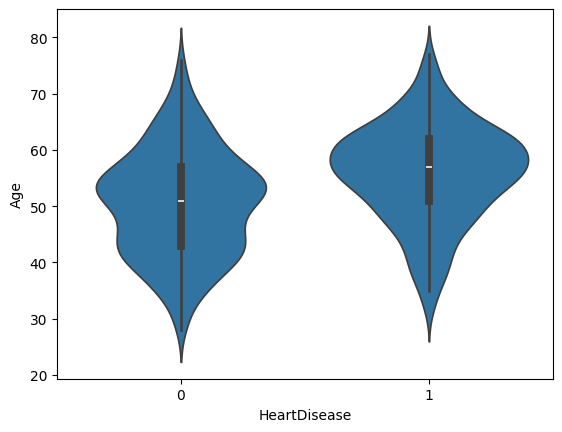

In [ ]:
sns.violinplot(x= 'HeartDisease', y='Age',data=df)

<Axes: >

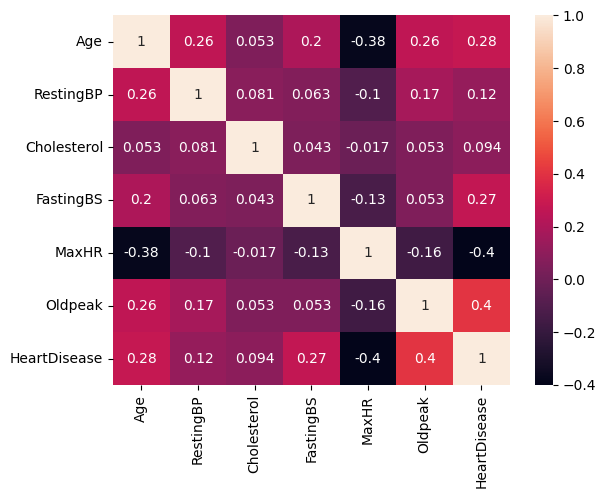

In [ ]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
df.drop('RestingECG',axis=1,inplace=True)


#Data preprocessing and cleaning

In [ ]:
df_encode = pd.get_dummies(df,drop_first=True)
df_encode = df_encode.astype(int)
df_encode = df_encode.rename(columns={'Sex_M': 'Gender'})
df_encode.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Gender,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


#Create Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.preprocessing import StandardScaler

In [ ]:
x= df_encode.drop('HeartDisease',axis=1)
y= df_encode['HeartDisease']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
models= {
    'LogisticRegression': LogisticRegression(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'GaussianNB': GaussianNB(),
    'SVC': SVC()
}

In [ ]:
result=[]

In [ ]:
for name,model in models.items():
  model.fit(x_train_scaled,y_train)
  y_pred = model.predict(x_test_scaled)
  acc = accuracy_score(y_test,y_pred)
  f1_result = f1_score(y_test,y_pred)
  result.append({
      'model':name,
      'accuracy':round(acc,4),
      'f1_score': round(f1_result,4)
  })

In [ ]:
result

[{'model': 'LogisticRegression', 'accuracy': 0.8587, 'f1_score': 0.8738},
 {'model': 'DecisionTreeClassifier', 'accuracy': 0.8098, 'f1_score': 0.8259},
 {'model': 'RandomForestClassifier', 'accuracy': 0.8696, 'f1_score': 0.8868},
 {'model': 'KNeighborsClassifier', 'accuracy': 0.8641, 'f1_score': 0.8804},
 {'model': 'GaussianNB', 'accuracy': 0.8478, 'f1_score': 0.8614},
 {'model': 'SVC', 'accuracy': 0.8424, 'f1_score': 0.8626}]

In [ ]:
import joblib
joblib.dump(models['RandomForestClassifier'],'RFC_heart.pkl')
joblib.dump(scaler,'scaler.pkl')
joblib.dump(x.columns.tolist(),'col.pkl')

['col.pkl']